In [88]:
from tools import vis, util

import json, imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tools import util
from tools import gridtools
from tools import vis
from tools import report

import json
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Dimensionality reduction techniques
from sklearn.decomposition import PCA, NMF
from sklearn.svm import SVC


from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

# Load the data
X is a DataFrame with one column, "text".

y is the corresponding topic category.

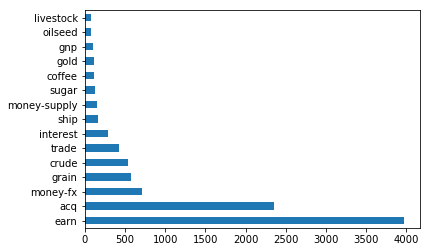

In [87]:
X, y = util.load_dataset('./processed/reuters.json')
counts = y.value_counts()
counts.iloc[:15].plot.barh(color=plt.cm.tab10(0))
mask = y.apply(set(counts.index[2:22]).__contains__)
X_small = X[mask]
y_small = y[mask]
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, random_state=42, test_size=.33)

In [102]:
len(X_small.columns)

1

## Distribution of classes
**earn** and **acq** are the two biggest classes, we're going to analyze the top 10 classes besides these two

In [93]:
pos.head()

,0,1
1,0.147841,-0.238797
100,-0.595249,-0.485081
10011,0.252322,-0.172029
10014,0.282348,0.196840
10015,0.663069,0.535700


# Create and run the pipeline
This will perform tokenization and counting, then topic modeling and project into 2-D using Isomap

In [92]:
# Original pipe, including Isomap reducer

pipe = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10, max_df=.3, stop_words='english')),
    ('tfidf_cp', util.Checkpoint()),
    ('topics', NMF(n_components=30)),
    ('topics_cp', util.Checkpoint()),
    ('norm', Normalizer(norm='l1')),
    ('proj', Isomap())
])

# run the pipeline
pos = pd.DataFrame(pipe.fit_transform(X_small.text), index=X_small.index)

In [97]:
# added in classifier

pipe = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10, max_df=.3, stop_words='english')),
    ('tfidf_cp', util.Checkpoint()),
    ('topics', NMF(n_components=30)),
    ('topics_cp', util.Checkpoint()),
    ('norm', Normalizer(norm='l1')),
    ('proj', Isomap()),
    ('clf', LinearSVC())
])

# run the pipeline
pipe.fit(X_small.text, y_small).predict(X_small.text)

array(['grain', 'money-fx', 'crude', ..., 'money-fx', 'grain', 'money-fx'], dtype=object)

In [112]:
pipeline = Pipeline(
    memory='./cache', 
    steps=[
    ('tfidf', TfidfVectorizer(min_df=1, stop_words='english')),
    #('tfidf_cp', util.Checkpoint()),
    ('topics', NMF(n_components=30)),
    #('topics_cp', util.Checkpoint()),
    ('norm', Normalizer(norm='l1')),
    #('proj', Isomap()),
    ('clf', LinearSVC())
])

grid = [{"topics__n_components": [50, 100, 150],
         "norm": [None, Normalizer(norm='l1'), Normalizer(norm='l2'), StandardScaler()],
         "clf": [LinearSVC(), RandomForestClassifier(), KNeighborsClassifier(), GaussianNB()]}]
classifier_search = GridSearchCV(pipeline, grid)
_ = classifier_search.fit(X_small.text, y_small)

#df = report.detail(X_test, y_test, n_search)

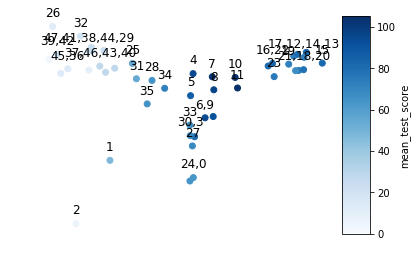

In [113]:
default_df = gridtools.scatter(classifier_search)

In [120]:
default_df.iloc[41]

mean_fit_time                                         0.418068
mean_score_time                                       0.660278
mean_test_score                                       0.682714
mean_train_score                                      0.852881
param_clf                              GaussianNB(priors=None)
param_norm                    Normalizer(copy=True, norm='l1')
param_topics__n_components                                 150
rank_test_score                                             38
split0_test_score                                     0.716578
split0_train_score                                    0.855162
split1_test_score                                      0.65745
split1_train_score                                     0.84902
split2_test_score                                     0.673879
split2_train_score                                    0.854462
std_fit_time                                        0.00722326
std_score_time                                      0.0

In [123]:
pipeline = Pipeline(
    memory='./cache', 
    steps=[
    ('tfidf', TfidfVectorizer(min_df=1, stop_words='english')),
    #('tfidf_cp', util.Checkpoint()),
    ('topics', NMF(n_components=30)),
    #('topics_cp', util.Checkpoint()),
    ('norm', Normalizer(norm='l1')),
    ('proj', Isomap()),
    ('clf', LinearSVC())
])

grid = [{"topics__n_components": [50, 100, 150],
         "norm": [None, Normalizer(norm='l1'), Normalizer(norm='l2'), StandardScaler()],
         "proj": [PCA(), Isomap()],
         "clf": [RandomForestClassifier(), KNeighborsClassifier(), GaussianNB()]}]
reducer_search = GridSearchCV(pipeline, grid)
_ = reducer_search.fit(X_small.text, y_small)

#df = report.detail(X_test, y_test, n_search)

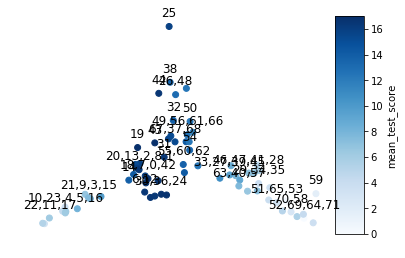

In [124]:
reducer_df = gridtools.scatter(reducer_search)

In [139]:
reducer_df.iloc[38]

mean_fit_time                                                          0.453631
mean_score_time                                                         1.31786
mean_test_score                                                        0.674008
mean_train_score                                                       0.789779
param_clf                     KNeighborsClassifier(algorithm='auto', leaf_si...
param_norm                                     Normalizer(copy=True, norm='l2')
param_proj                    PCA(copy=True, iterated_power='auto', n_compon...
param_topics__n_components                                                  150
rank_test_score                                                              29
split0_test_score                                                      0.699007
split0_train_score                                                     0.802773
split1_test_score                                                      0.648233
split1_train_score                      

In [ ]:
pipeline = Pipeline(
    memory='./cache', 
    steps=[
    ('tfidf', TfidfVectorizer(min_df=1, stop_words='english')),
    #('tfidf_cp', util.Checkpoint()),
    ('topics', NMF(n_components=30)),
    #('topics_cp', util.Checkpoint()),
    ('norm', Normalizer(norm='l1')),
    ('proj', Isomap()),
    ('clf', LinearSVC())
])

grid = [{"topics__n_components": [50, 100, 150],
         "proj": [PCA(), Isomap()],
         "clf": [RandomForestClassifier(), KNeighborsClassifier(), GaussianNB()]}]
reducer_search = GridSearchCV(pipeline, grid)
_ = reducer_search.fit(X_small.text, y_small)

#df = report.detail(X_test, y_test, n_search)

In [79]:
len(pipe.named_steps['topics_cp'].X_transform.argmax(axis=1))
X_tfidf = pipe.named_steps['tfidf_cp'].X_transform
type(X_tfidf)

scipy.sparse.csr.csr_matrix

In [86]:
keywords = pd.DataFrame([vocab[sorted(xi.nonzero()[1], key=lambda i: components[j, i])[-n_keywords:]]
                         for xi,j in zip(X_tfidf, X_topics)], index=X_small.index)
keywords.head()

,0,1,2,3,4
1,nearby,june,new,prices,cocoa
100,compared,1986,rise,rose,january
10011,cubic,natural,production,gas,oil
10014,new,chairman,executive,member,cocoa
10015,oils,commission,european,tax,ec


# Visualize
Show keywords from sample documents

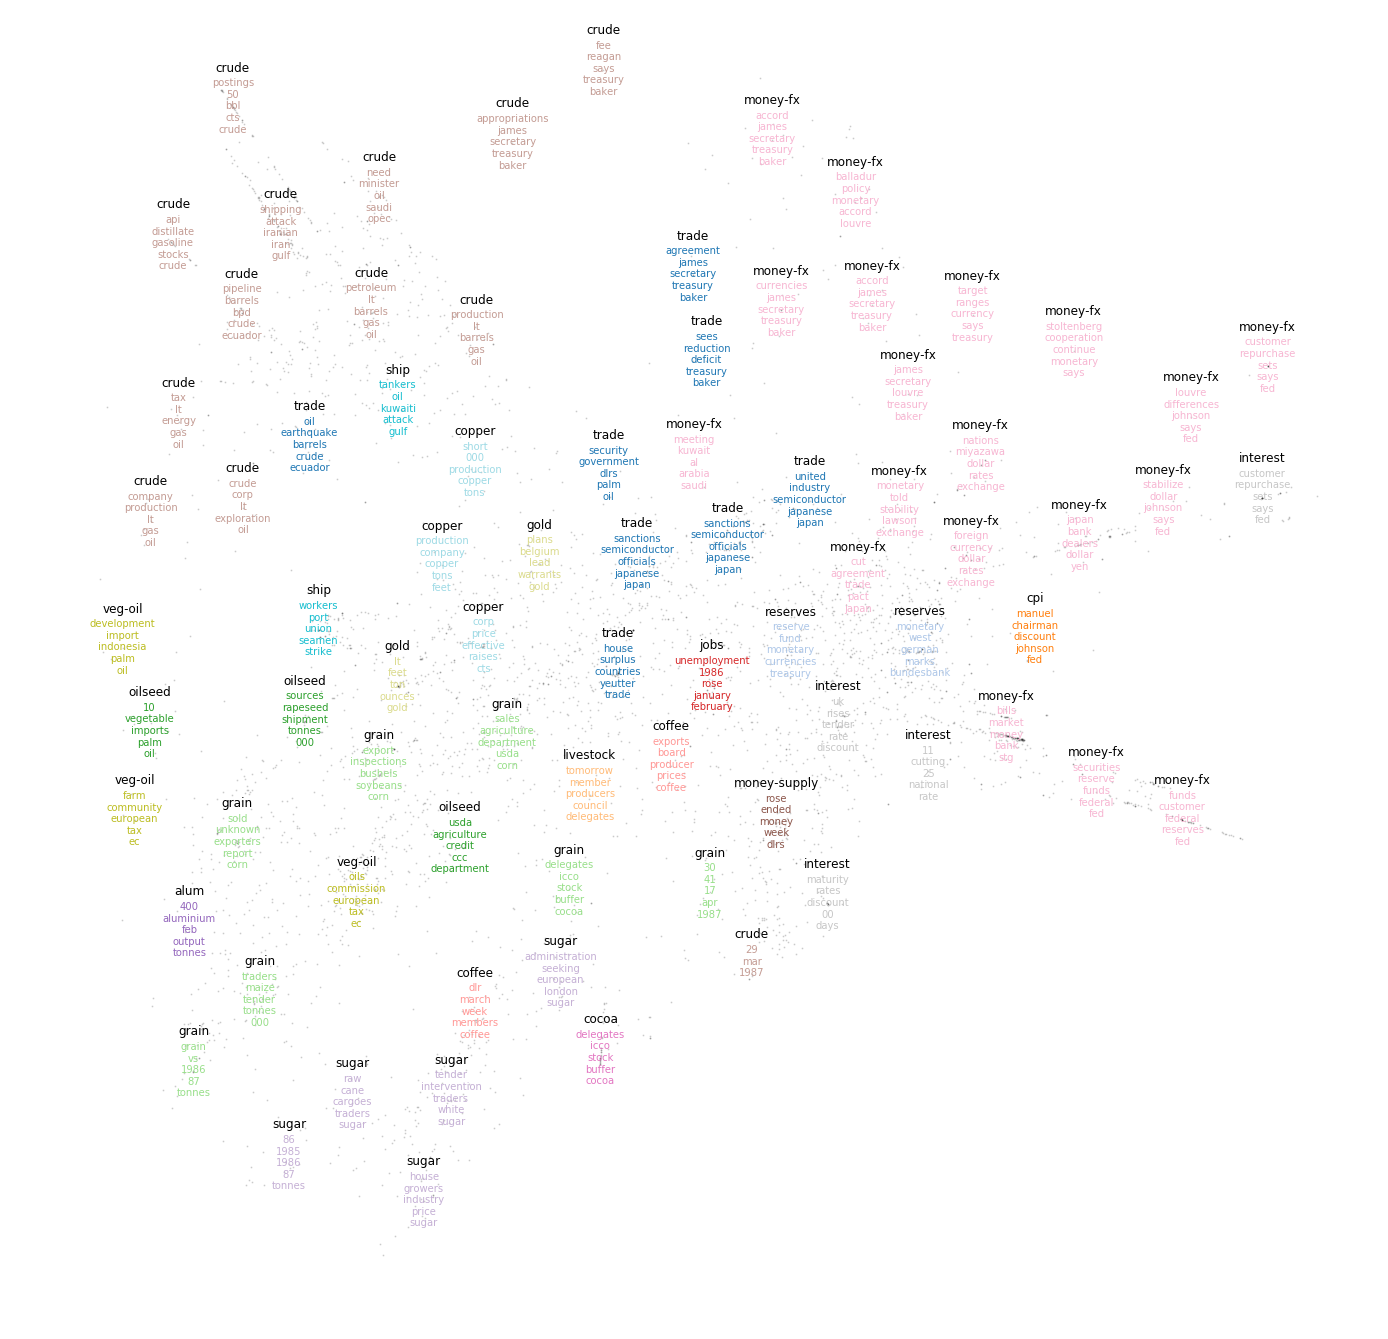

In [61]:
# grab some of the intermediate data from the pipeline
vocab = np.array(pipe.named_steps['tfidf'].get_feature_names())
components = pipe.named_steps['topics'].components_
X_tfidf = pipe.named_steps['tfidf_cp'].X_transform
X_topics = pipe.named_steps['topics_cp'].X_transform.argmax(axis=1)


# figure out keywords for each topic
# takes the keywords occurring in the document from the most important topic from that document
n_keywords = 5
keywords = pd.DataFrame([vocab[sorted(xi.nonzero()[1], key=lambda i: components[j, i])[-n_keywords:]]
                         for xi,j in zip(X_tfidf, X_topics)], index=X_small.index)

colors = {v: plt.cm.tab20(i%20) for i,v in enumerate(set(y_small))}
    
plt.figure(figsize=(24, 24))
plt.axis('off')

for x, ax in vis.subplots_scatter(pos, s=.035, scatter_args=dict(s=1, alpha=.125, c='k')):
    x0 = x[0]
    vis.keywords_plot(keywords.loc[x0].dropna(), y_small.loc[x0], colors)

# Ideas for exploration
* Try looking at subsets, e.g.,
    * Top 3 topics
    * Bottom k
    * Manually selected (e.g., commodities only)
* Try more feature engineering
    * n-Grams
    * adjust TFIDF parameters
* Use a different keywords suggestion heuristic

In [66]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA, NMF

#X_small = X_train[mask]
#y_small = y_train[mask]

pipe = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10, max_df=.3, stop_words='english')),
    ('tfidf_cp', util.Checkpoint()),
    ('topics', NMF(n_components=30)),
    ('topics_cp', util.Checkpoint()),
    ('norm', Normalizer(norm='l1')),
    ('proj', PCA(n_components=2))
])

# run the pipeline
pos = pd.DataFrame(pipe.fit_transform(X_small.text), index=X_small.index)

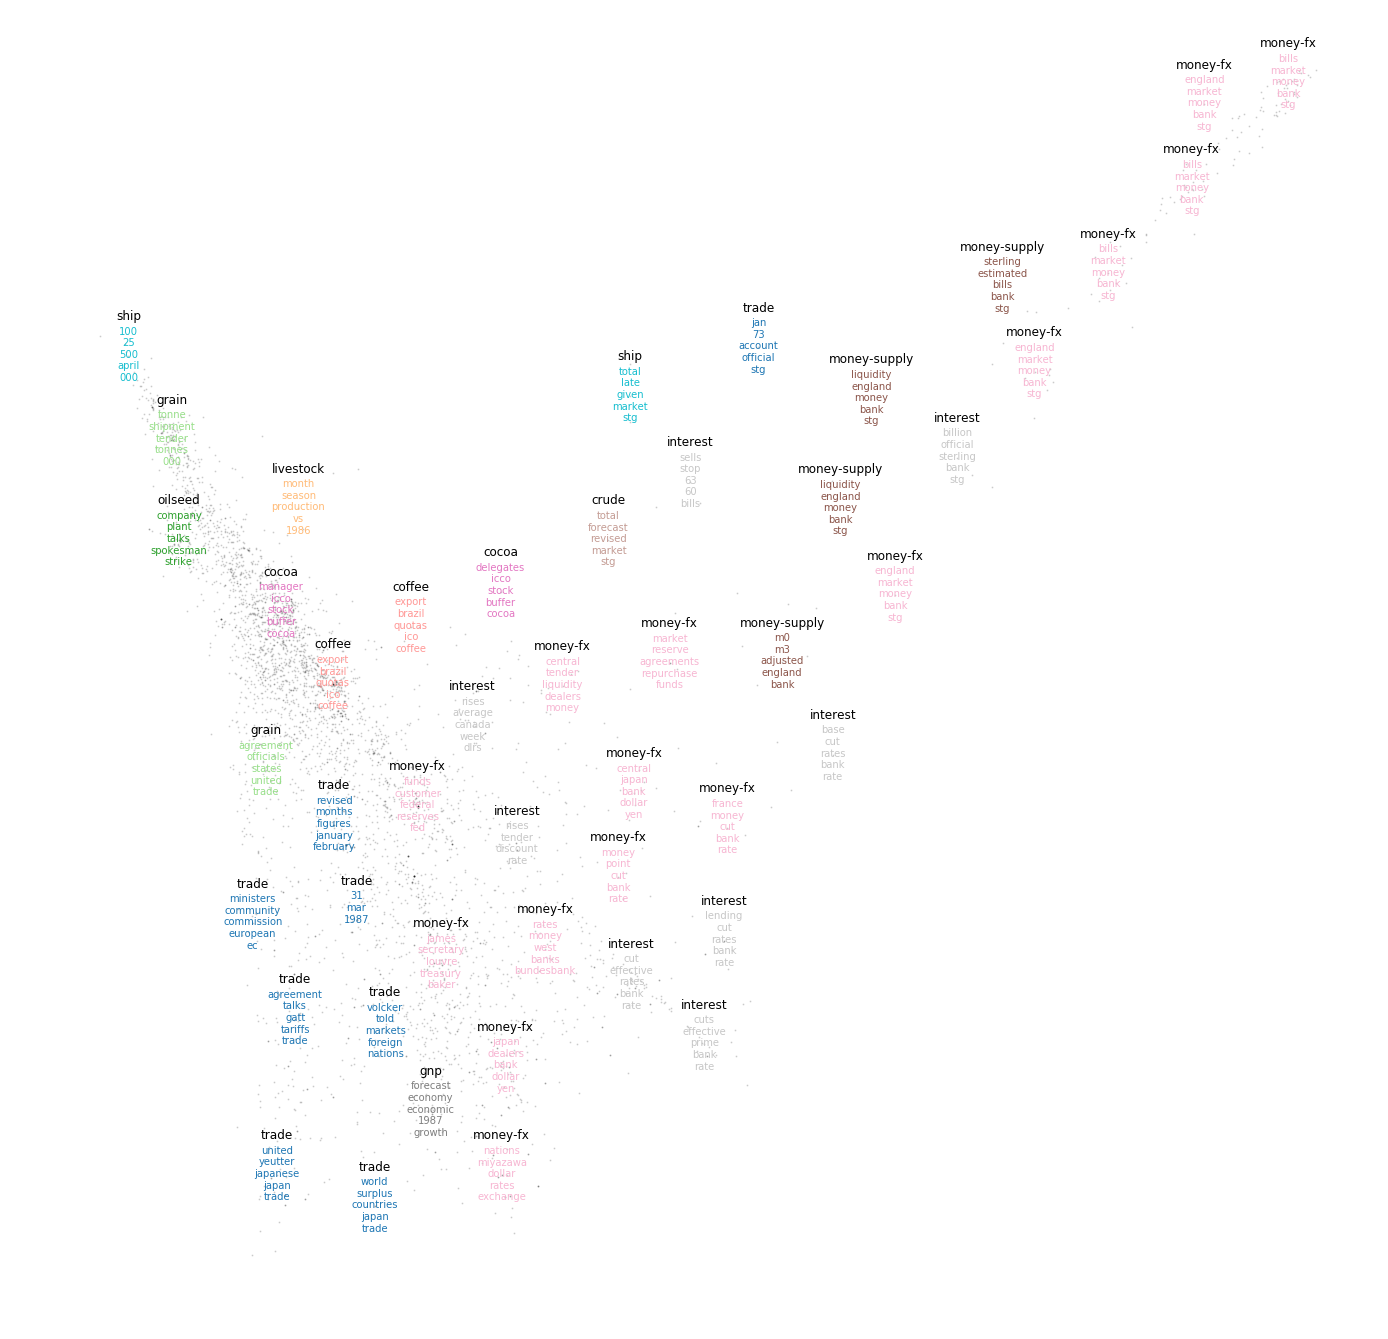

In [67]:
# grab some of the intermediate data from the pipeline
vocab = np.array(pipe.named_steps['tfidf'].get_feature_names())
components = pipe.named_steps['topics'].components_
X_tfidf = pipe.named_steps['tfidf_cp'].X_transform
X_topics = pipe.named_steps['topics_cp'].X_transform.argmax(axis=1)


# figure out keywords for each topic
# takes the keywords occurring in the document from the most important topic from that document
n_keywords = 5
keywords = pd.DataFrame([vocab[sorted(xi.nonzero()[1], key=lambda i: components[j, i])[-n_keywords:]]
                         for xi,j in zip(X_tfidf, X_topics)], index=X_small.index)

colors = {v: plt.cm.tab20(i%20) for i,v in enumerate(set(y_small))}
    
plt.figure(figsize=(24, 24))
plt.axis('off')

for x, ax in vis.subplots_scatter(pos, s=.035, scatter_args=dict(s=1, alpha=.125, c='k')):
    x0 = x[0]
    vis.keywords_plot(keywords.loc[x0].dropna(), y_small.loc[x0], colors)

In [68]:
from sklearn.manifold import MDS
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA, NMF

#X_small = X_train[mask]
#y_small = y_train[mask]

pipe = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10, max_df=.3, stop_words='english')),
    ('tfidf_cp', util.Checkpoint()),
    ('topics', NMF(n_components=30)),
    ('topics_cp', util.Checkpoint()),
    ('norm', Normalizer(norm='l1')),
    ('proj', MDS(n_components=2))
])

# run the pipeline
pos = pd.DataFrame(pipe.fit_transform(X_small.text), index=X_small.index)

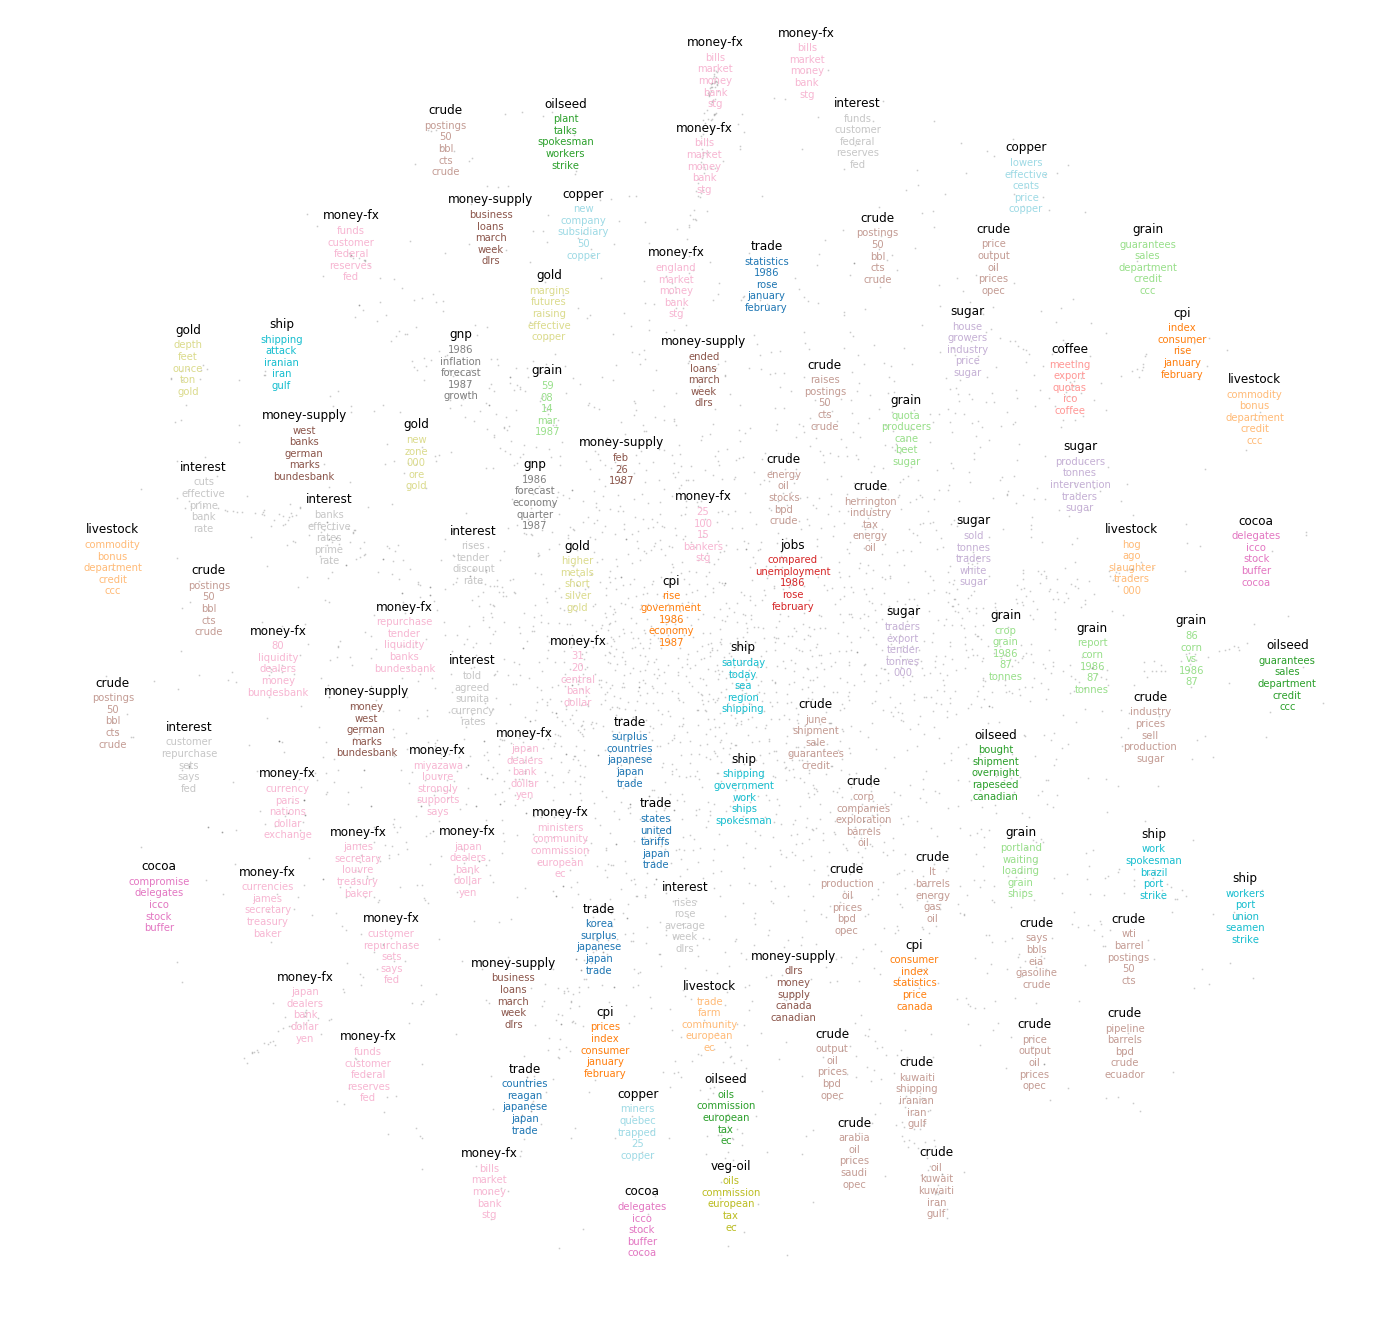

In [69]:
# grab some of the intermediate data from the pipeline
vocab = np.array(pipe.named_steps['tfidf'].get_feature_names())
components = pipe.named_steps['topics'].components_
X_tfidf = pipe.named_steps['tfidf_cp'].X_transform
X_topics = pipe.named_steps['topics_cp'].X_transform.argmax(axis=1)


# figure out keywords for each topic
# takes the keywords occurring in the document from the most important topic from that document
n_keywords = 5
keywords = pd.DataFrame([vocab[sorted(xi.nonzero()[1], key=lambda i: components[j, i])[-n_keywords:]]
                         for xi,j in zip(X_tfidf, X_topics)], index=X_small.index)

colors = {v: plt.cm.tab20(i%20) for i,v in enumerate(set(y_small))}
    
plt.figure(figsize=(24, 24))
plt.axis('off')

for x, ax in vis.subplots_scatter(pos, s=.035, scatter_args=dict(s=1, alpha=.125, c='k')):
    x0 = x[0]
    vis.keywords_plot(keywords.loc[x0].dropna(), y_small.loc[x0], colors)